In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

/home/mathys/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


You will need to scrap at least one VV/VH satelitte image using the extract_sentinel1.py

In [2]:
fname = '../Sentinel1_Images_Beauvais/'
list_dir = os.listdir(fname)
list_dir

['12_03_17_vh.png',
 '11_03_17_vh.png',
 '16_01_17_vv.png',
 '14_03_17_vv.png',
 '01_01_17_vh.png',
 '13_03_17_vv.png',
 '10_03_17_vh.png',
 '10_03_17_vv.png',
 '16_01_17_vh.png',
 '13_03_17_vh.png',
 '14_03_17_vh.png',
 '11_03_17_vv.png',
 '12_03_17_vv.png',
 '01_01_17_vv.png']

In [3]:
vv_list = list()
vh_list = list()

for f in list_dir:
    type_f = f[-6:-4]

    if type_f == 'vh':
        vh_list.append(fname+f)
    else :
        vv_list.append(fname+f)

vv_list

['../Sentinel1_Images_Beauvais/16_01_17_vv.png',
 '../Sentinel1_Images_Beauvais/14_03_17_vv.png',
 '../Sentinel1_Images_Beauvais/13_03_17_vv.png',
 '../Sentinel1_Images_Beauvais/10_03_17_vv.png',
 '../Sentinel1_Images_Beauvais/11_03_17_vv.png',
 '../Sentinel1_Images_Beauvais/12_03_17_vv.png',
 '../Sentinel1_Images_Beauvais/01_01_17_vv.png']

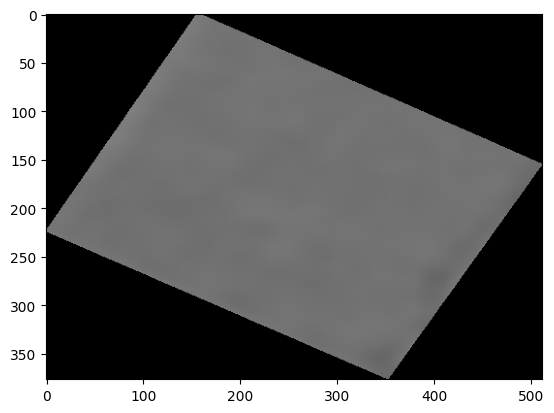

In [4]:
im_try_vv = cv2.imread(vv_list[0], cv2.COLOR_BGR2GRAY)
im_try_vh = cv2.imread(vh_list[0], cv2.COLOR_BGR2GRAY)

plt.imshow(im_try_vv)

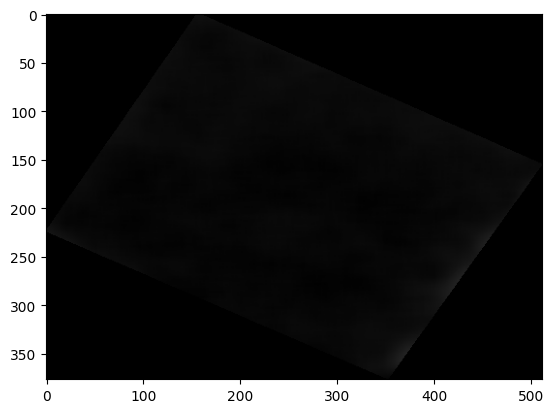

In [5]:
plt.imshow(im_try_vh)

### Using canny

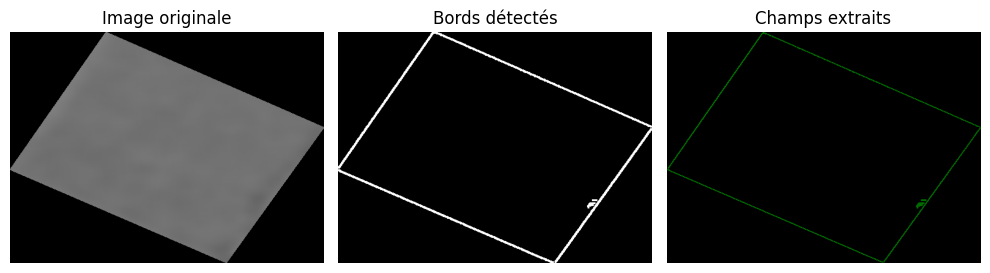

In [6]:
#Pour VH
image = im_try_vv
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Canny
edges = cv2.Canny(blurred, 0, 14)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thick_edges = cv2.dilate(edges, kernel, iterations=1)

# contours
contours, _ = cv2.findContours(thick_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mask
mask = np.zeros_like(image)
cv2.drawContours(mask, contours, -1, (0, 255, 0), thickness=cv2.FILLED)
extracted_fields = cv2.bitwise_and(image, mask)

plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Image originale')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Bords détectés')
plt.imshow(thick_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Champs extraits')
plt.imshow(cv2.cvtColor(extracted_fields, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

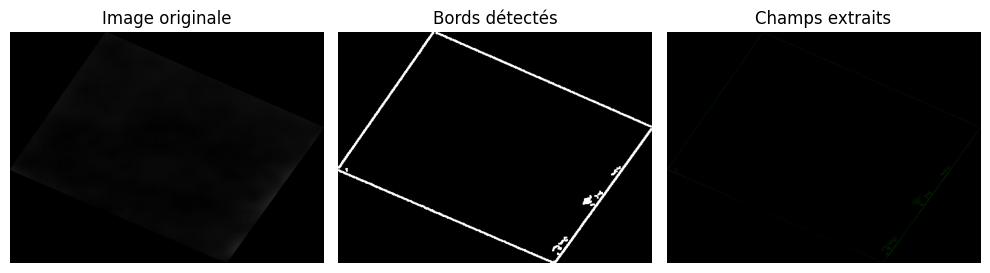

In [7]:
#Pour VH
image = im_try_vh
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Canny
edges = cv2.Canny(blurred, 0, 14)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thick_edges = cv2.dilate(edges, kernel, iterations=1)

# contours
contours, _ = cv2.findContours(thick_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mask
mask = np.zeros_like(image)
cv2.drawContours(mask, contours, -1, (0, 255, 0), thickness=cv2.FILLED)
extracted_fields = cv2.bitwise_and(image, mask)



plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Image originale')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Bords détectés')
plt.imshow(thick_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Champs extraits')
plt.imshow(cv2.cvtColor(extracted_fields, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

### Using sobel

In [8]:
# Étape 3 : Appliquer un flou pour réduire le bruit
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Étape 4 : Calculer les gradients avec le filtre de Sobel
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # Gradient dans la direction x
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Gradient dans la direction y


# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(im_try_vv, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

_, sobel_binary = cv2.threshold(sobelxy, 0, 255, cv2.THRESH_BINARY)


# Étape 6 : Trouver les contours
contours, _ = cv2.findContours(sobel_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Étape 7 : Créer un masque pour extraire les champs
mask = np.zeros_like(image)
cv2.drawContours(mask, contours, -1, (0, 255, 0), thickness=cv2.FILLED)

# Extraire les champs de l'image originale
extracted_fields = cv2.bitwise_and(image, mask)

# Afficher les résultats
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Image originale')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Magnitude du Sobel')
plt.imshow(sobelxy, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Champs extraits')
plt.imshow(cv2.cvtColor(extracted_fields, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/contours_new.cpp:327: error: (-2:Unspecified error) in function 'static std::shared_ptr<ContourScanner_> ContourScanner_::create(cv::Mat, int, int, cv::Point)'
> Modes other than RETR_FLOODFILL and RETR_CCOMP support only CV_8UC1 images (expected: 'img.type() == CV_8UC1'), where
>     'img.type()' is 22 (CV_64FC3)
> must be equal to
>     'CV_8UC1' is 0 (CV_8UC1)
